In [5]:
import pandas as pd

import numpy as np
import os

import matplotlib.pyplot as plt

%matplotlib inline


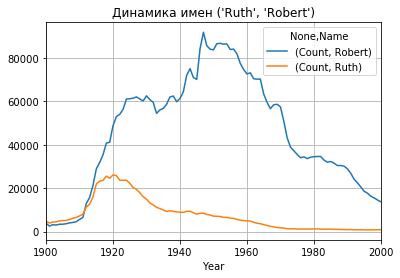

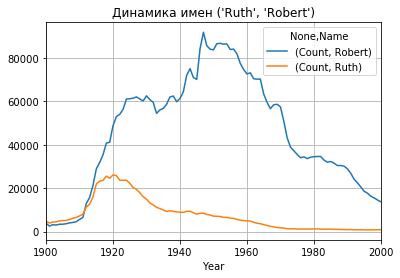

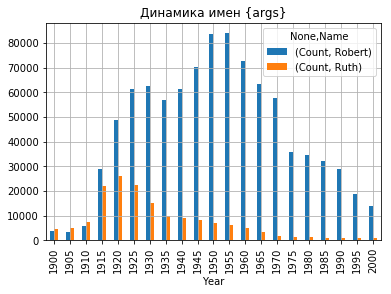

In [47]:
DATA_PATH = './names/'
cols = ['Name', 'Gender', 'Count']


def dynamic_names(*args):
    names_by_year = {}
    for year in range(1900, 2001):
        names_by_year[year] = pd.read_csv(DATA_PATH + f'yob{year}.txt',
                                          names=cols)
    names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
    name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
    name_dynamics.query(f'Name == {args}').unstack('Name').plot(title=f'Динамика имен {args}', grid=True)
    return name_dynamics.query(f'Name == {args}').unstack('Name')


def count_names(start, end, n=1, *args):
    names_by_year = dynamic_names(*args)
    lst= [i for i in range(start, end, n)]
    names_by_year = names_by_year.query(f'Year=={lst}')   
    names_by_year.plot.bar(title='Динамика имен {args}', grid=True)


def letter_name(year, letter, n):
    names = pd.read_csv(DATA_PATH + f'yob{year}.txt',
                        names=cols)
    names = names[(names.Name.str.startswith(letter))].groupby('Name').sum().sort_values(by='Count',
                                                                                         ascending=False).head(n)
    names.plot.pie(y='Count', title=f'Имена на букву {letter} за {year}г.', autopct='%1.1f%%', shadow=True,
                   explode=tuple([0 if i != 1 else 0.1 for i in range(n)]), legend=False)


def consonant(*args):
    names_by_year = {}
    for year in args:
        names_by_year[year] = pd.read_csv(DATA_PATH + year,
                                          names=cols)
    names_all = pd.concat(names_by_year, names=['Pos'])
    names_all = names_all.groupby(['Name']).sum().sort_values(by='Count',
                                                              ascending=False)
    names_all.reset_index(inplace=True)
    def count_to_len(row):
        return len([i for i in row.Name.lower() if i not in ['a', 'e', 'i', 'o', 'u']])
    names_all['quant_consonant'] = names_all.apply(count_to_len, axis=1)
    names_all.plot.scatter(x='quant_consonant', y='Count')
    # print(names_all.query('quant_consonant==8')) Name = Christopher, портит нормальное распределение



dynamic_names('Ruth', 'Robert')
count_names(1900, 2001, 5,'Ruth', 'Robert')
letter_name(1950, 'R', 10)
consonant(*os.listdir(DATA_PATH))